<a href="https://colab.research.google.com/github/vcorredorg/SenalesySistemas2025/blob/main/Taller2/Transformada_de_fourier/a.%20Ejercicios_cuaderno_Transformada_de_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from time import perf_counter
import subprocess
from pathlib import Path
import soundfile as sf
import imageio_ffmpeg
from IPython.display import Audio
import sympy as sp
import time

#Ejercicios Cuaderno Transformada de Fourier

##1.Presente y describa el modelo que utiliza la FFT para el cálculo de los armónicos.

###**Serie de Fourier**:

La **Serie de Fourier** representa una señal periódica \(x(t)\) como suma de senos y cosenos (o, equivalentemente, exponenciales complejas). De tal manera que cualquier forma periódica puede descomponerse en **armónicos** de una frecuencia fundamental $ \omega_0 $, con pesos (coeficientes) que miden cuánto aporta cada armónico. Sin dejar de lado que la Serie de Fourier solo evalúa la señal en un segmento finito de t.

####Forma compleja
$$
x(t)=\sum_{k=-N}^{N} c_k\, e^{jk\omega_0 t},
\qquad
c_k=\frac{1}{T}\int_{t_0}^{t_0+T} x(t)\,e^{-jk\omega_0 t}\,dt.
$$

####**Serie trigonométrica**
Para una función periódica de periodo T, la serie trigonométrica de Fourier de una función f(t) se expresa como:

$$
f(t) \sim a_0 + \sum_{n=1}^{\infty} \left[ a_n \cos(n \omega_0 t) + b_n \sin(n \omega_0 t) \right]
$$
Con coeficientes:
$$
a_0 = \frac{1}{T} \int_{t_0}^{\,t_0 + T} f(t)\, dt
$$

$$
a_n = \frac{2}{T} \int_{t_0}^{\,t_0 + T} f(t)\cos(n\omega_0 t)\, dt,\quad n \ge 1
$$

$$
b_n = \frac{2}{T} \int_{t_0}^{\,t_0 + T} f(t)\sin(n\omega_0 t)\, dt,\quad n \ge 1
$$

¿Por qué funciona la serie de Fourier?  
Porque las funciones:

$$\{\cos(n\omega_0 t),\; \sin(n\omega_0 t)\,\}$$

son **ortogonales** entre sí en un período \(T\).  
Esto significa que el producto interno entre funciones diferentes es cero.

$$
\int_{t_0}^{t_0 + T} \cos(n\omega_0 t)\sin(m\omega_0 t)\,dt = 0
$$

####**Serie compacta (forma exponencial)**
En señales, “forma compacta” y “forma exponencial” de la serie de Fourier son lo mismo. “Compacta” es solo el apodo porque la notación con exponenciales complejas queda más corta y limpia que la trigonométrica.
$$f(t) \sim \sum_{n=-\infty}^{\infty} c_n\, e^{j n \omega_0 t}
$$

donde los coeficientes complejos se calculan como:

$$
c_n = \frac{1}{T} \int_{t_0}^{\, t_0 + T} f(t)\, e^{-j n \omega_0 t}\, dt
$$

####Relación entre formas (para \(n > 0\)):

$$
c_0 = \frac{a_0}{2}
$$

$$
c_n = \frac{a_n - j b_n}{2}
$$

$$
c_{-n} = \frac{a_n + j b_n}{2}
$$

###**Transformada de Fourier**
La **Transformada de Fourier** en tiempo continuo se puede interpretar como la extensión de la Serie de Fourier, que permite evaluar la señal en un segmento de tiempo infinito y espectro en frecuencia continuo (función de densidad espectral). Sea x(t) una señal en tiempo continuo, la Transformada de Fourier se define como:
$$
X(\omega) = \int_{-\infty}^{\infty} x(t)e^{-j\omega t}\,dt
$$

De esta manera, la Transformada inversa se describe mediante:
$$
x(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} X(\omega)e^{j\omega t}\,d\omega
$$


###**DTFT (Transformada de Fourier en tiempo discreto)**
Teniendo en cuenta que la frecuencia sigue siendo continua, se obtiene la siguiente expresión:
$$
X(\omega) = \sum_{k∈ℤ} x[k]\, e^{-j\omega k}
$$

###**DFT (Transformada Discreta de Fourier)**
Teniendo en cuenta que tanto la frecuencia como el tiempo son discretos, se obtiene la siguiente expresión:
Sea x[n] de longitud **K**
$$
X[k] = \sum_{n=0}^{k-1} x[n]\, e^{-j\frac{2\pi}{K}kn}
$$

---
###**1.1Cálculo de armónicos usando la Transformada Rápida de Fourier (FFT)**
Cuando hablamos de “calcular los armónicos”, lo que queremos saber es:

-Qué frecuencias están presentes en la señal,

-Con qué amplitud (qué tan fuertes son)

####**Modelo matemático**
Toda señal periódica $x(t)$ puede representarse como una suma ponderada de senos y cosenos:

$$
x(t) = \sum_{k=-\infty}^{\infty} C_k\, e^{j k \omega_0 t}
$$


donde: $\omega_0$ es la **frecuencia fundamental**, $T$ el período y $C_k$ son los **coeficientes de Fourier**, que indican cuánta energía o contribución tiene cada armónico $k$ en la señal.
El conjunto de todos los $C_k$ es el modelo de Fourier, y de él obtenemos los armónicos.

####**De la teoría de la DFT y la FFT**

En la práctica, la señal no se mide de forma continua, sino como una lista de muestras discretas. Para hallar sus componentes en frecuencia, aplicamos la Transformada Discreta de Fourier.
$$
X[k] = \sum_{n=0}^{N-1} x[n]\, e^{-j\frac{2\pi}{N}kn}
$$

Cada valor $X[k]$ nos indica cuánto contenido hay del armónico de frecuencia

El problema: calcular esa suma directamente requiere muchas multiplicaciones (es lento si N es grande).

####**Modelo FFT: una versión rápida del mismo cálculo**

La FFT (*Fast Fourier Transform*) **no es una transformada diferente** —es exactamente la misma **DFT**—.
Lo que cambia es la forma de calcularla: la FFT utiliza un algoritmo eficiente que aprovecha la **simetría** de los términos exponenciales para reducir el número de operaciones necesarias.

Mientras que la DFT directa requiere aproximadamente:

$N^2$ operaciones, la FFT reduce ese costo a:

$$
N \log_2(N)
$$

lo que la hace mucho más rápida, especialmente para valores grandes de $N$.
Separamos el índice $n$ en pares e impares:

- Para los **pares**: $n = 2m$
- Para los **impares**: $n = 2m + 1$
con $
m = 0, 1, 2, \dots, \frac{N}{2}-1.
$

Definimos:

$$
x_{\text{par}}[m] := x[2m], \qquad
x_{\text{imp}}[m] := x[2m+1],
$$

con $m = 0, \dots, \frac{N}{2}-1$.

### **Sustituyendo en la DFT:**

$$
X[k] =
\sum_{m=0}^{\frac{N}{2}-1} x[2m]\,W_N^{k(2m)}
+
\sum_{m=0}^{\frac{N}{2}-1} x[2m+1]\,W_N^{k(2m+1)}
$$

donde: $W_N = e^{-j\frac{2\pi}{N}}$

### **Reorganizando términos:**

$$
X[k] =
\underbrace{
\sum_{m=0}^{\frac{N}{2}-1} x_{\text{par}}[m]\,(W_{N/2})^{km}
}_{E[k]}
\;+\;
W_N^k
\underbrace{
\sum_{m=0}^{\frac{N}{2}-1} x_{\text{imp}}[m]\,(W_{N/2})^{km}
}_{O[k]}
$$

### **Conclusión clave**
Tanto $E[k]$ (DFT de la mitad par de la señal original) como $O[k]$ (DFT de las muestras impares) son **DFT de tamaño** $\frac{N}{2}$.

Este es el **paso fundamental** que permite que la FFT reduzca el cálculo de $N^2$ operaciones a $N\log_2 (N)$.

---

####**1.2Realice una comparación del tiempo de cómputo requerido para el cálculo de la transformada discreta de Fourier utilizado la estimación por sumatoria vs la FFT. Pruebe distintos valores de longitud de la señal de entrada (4,8,16,32,64,128,256,512,1024,2048,4096). Presente una gráfica comparativa de los tiempos de ejecución en segundos vs la longitud de la señal de entrada.**

####Fundamento teórico: por qué deben diferir los tiempos

La DFT tiene la forma:
$$
X[k] = \sum_{n=0}^{N-1} x[n]\, e^{-j\frac{2\pi}{N}kn}, \qquad k = 0,1,\dots,N-1.
$$

Para cada valor de \(k\) se realizan \(N\) multiplicaciones y \(N - 1\) sumas, y como hay \(N\) valores posibles de \(k\), el total de operaciones crece de forma cuadrática.

Por tanto, la complejidad temporal es:

$$O(N^2)$$

La FFT (radix-2 Cooley-Tukey) reduce el problema recursivamente y aprovecha simetrías, lo que disminuye el número total de operaciones.

Por tanto, la complejidad temporal es:

$$O(N \log_2 N)$$






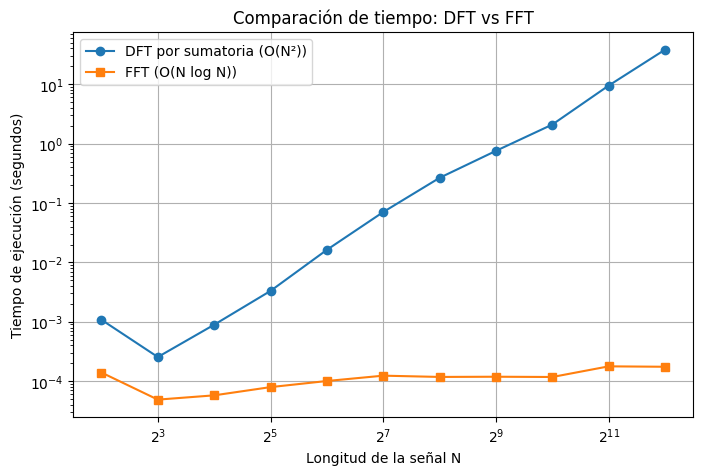

In [ ]:
# Definición DFT mediante sumatoria
def DFT_manual(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
    return X

# Longitudes de prueba
N_values = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]

# Resultados
times_DFT = []
times_FFT = []

for N in N_values:
    x = np.random.rand(N)  # señal aleatoria

    # Tiempo DFT sumatoria
    start = time.time()
    DFT_manual(x)
    times_DFT.append(time.time() - start)

    # Tiempo FFT numpy
    start = time.time()
    np.fft.fft(x)
    times_FFT.append(time.time() - start)

# Gráfica comparativa
plt.figure(figsize=(8,5))
plt.plot(N_values, times_DFT, 'o-', label='DFT por sumatoria (O(N²))')
plt.plot(N_values, times_FFT, 's-', label='FFT (O(N log N))')
plt.xlabel('Longitud de la señal N')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Comparación de tiempo: DFT vs FFT')
plt.grid(True)
plt.legend()
plt.xscale('log', base=2)
plt.yscale('log')
plt.show()


###**1.3Consulte en qué consiste la frecuencia de -3dB y su relación con las frecuencias de corte en el filtrado espectral de señales.**
Cuando se habla de decibelios (dB), estamos expresando una relación de potencia o amplitud en una escala logarítmica.

Por definición:
$$\text{Nivel (dB)} = 10 \log_{10}\left(\frac{P_1}{P_2}\right)$$

Si se trabaja con amplitudes (voltaje, corriente o magnitud de la respuesta del sistema), la potencia es proporcional al cuadrado de la amplitud.

$$\text{Nivel (dB)} = 20 \log_{10}\left(\frac{|A_1|}{|A_2|}\right)$$

Teniendo en cuenta lo anterio, la frecuencia de los -3dB, me representa el punto donde la potencia transmitida cae a la mitad de la potencia máxima.

$$10 \log_{10}\left(\frac{1}{2}\right) \approx -3.0103 \ \text{dB}$$

####**Interpretación en términos de amplitud**

Como la potencia es proporcional al cuadrado de la amplitud:

$$\frac{P_1}{P_2} = \left(\frac{A_1}{A_2}\right)^2 = \frac{1}{2}$$

Por lo tanto:
$$\frac{A_1}{A_2} = \sqrt{\frac{1}{2}} \approx 0.707$$

De lo cual es posible dcir que en la frecuencia de −3 dB la amplitud vale el 70.7 % de su valor máximo.

####**Relación con la frecuencia de corte**

En un filtro (sea analógico o digital), la frecuencia de corte es precisamente aquella donde la ganancia del filtro cae a −3 dB respecto a la ganancia máxima (la del paso de banda o paso bajo).

-En un filtro **pasa-bajos**, el filtro deja pasar frecuencias hasta cierto punto. A partir de la **frecuencia de corte** fc, la señal empieza a atenuarse.

-En un filtro **pasa-altos**, ocurre lo inverso: las frecuencias por debajo de fc  se atenúan, mientras que a partir de la frecuencia de corte el filtro deja pasar.

Por lo tanto, la **frecuencia de corte** corresponde a la **frecuencia de −3 dB**.


####**Filtrado espectral de señales**

Al analizar una señal en el dominio de la frecuencia y se aplica un filtro espectral, normalmente  se multiplica su espectro por una ventana de ganancia (la respuesta en frecuencia del filtro).

La frecuencia de −3 dB marca la frontera entre las frecuencias que el filtro conserva y las que atenúa significativamente.

---
###**Implemente un filtro pasa bajas, un pasa altas, un pasa bandas, y un rechaza bandas utilizando la FFT y la iFFT sobre 5 segundos de su canción favorita de YouTube.**


In [ ]:
import subprocess
import sys

# Install yt-dlp if not already installed
try:
    subprocess.run(['yt-dlp', '--version'], check=True, capture_output=True)
except FileNotFoundError:
    print("yt-dlp not found. Installing...")
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'yt-dlp'])
    print("yt-dlp installed.")

ffmpeg_path = imageio_ffmpeg.get_ffmpeg_exe()

# Descargar audio de YouTube usando yt-dlp
link = "https://www.youtube.com/watch?v=T_FkEw27XJ0&list=RDT_FkEw27XJ0&start_radio=1"
yt_dlp_cmd = [
    'yt-dlp',
    '--no-playlist',
    '--extract-audio',
    '--audio-format', 'wav',
    '--ffmpeg-location', ffmpeg_path,
    '-o', 'audio.%(ext)s',
    link,
]
subprocess.run(yt_dlp_cmd, check=True)

wav_candidates = sorted(Path('.').glob('audio*.wav'), key=lambda p: p.stat().st_mtime, reverse=True)
if not wav_candidates:
    raise FileNotFoundError('.wav file not found after download.')
wav_path = wav_candidates[0]

In [ ]:
audio, F_s = sf.read(wav_path)
audio.shape

(10082291, 2)

In [ ]:
# Grafica ambos canales en tiempo y frecuencia
def plot_domains(t_n, x_n, f_k, X_k, suptitle=''):
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    # Dominio del tiempo
    axes[0].plot(t_n, x_n[:, 0], label='$x_{left}[n]$', color='red')
    axes[0].plot(t_n, x_n[:, 1], label='$x_{right}[n]$', color='blue')
    axes[0].set_xlabel('Tiempo [s]')
    axes[0].set_ylabel('Amplitud')
    axes[0].set_title('$x[n]$')
    axes[0].grid(True)
    axes[0].legend(loc='upper right')

    # Dominio de la frecuencia
    axes[1].plot(f_k, np.abs(X_k[:, 0]), label='$X_{left}[f]$', color='red')
    axes[1].plot(f_k, np.abs(X_k[:, 1]), label='$X_{right}[f]$', color='blue')
    axes[1].set_xlabel('Frecuencia [Hz]')
    axes[1].set_ylabel('Magnitud')
    axes[1].set_title('$X[k]$')
    axes[1].grid(True)
    axes[1].legend(loc='upper right')

    if suptitle:
        fig.suptitle(suptitle)
    fig.tight_layout()
    plt.show()

In [ ]:
t_0 = 55 # [s]
t_f = 60 # [s]
audio_segment = audio[int(t_0*F_s):int(t_f*F_s), :]
Audio(audio_segment.T, rate=F_s)

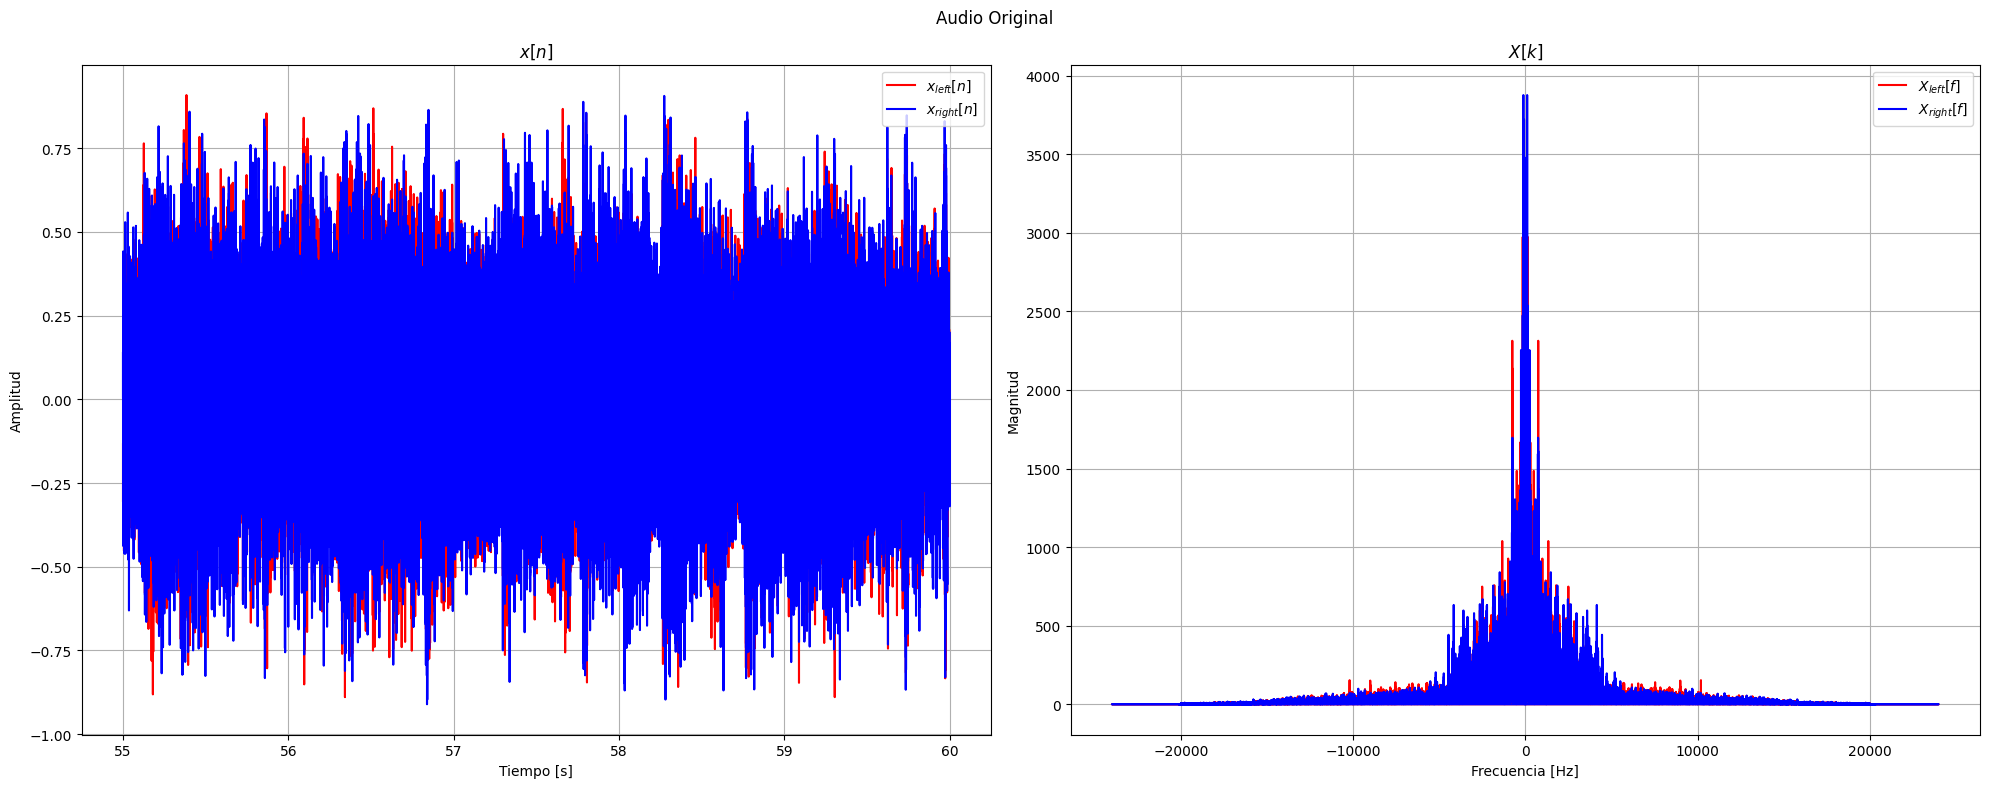

In [ ]:
x_n = audio_segment.copy()          # x[n] Segmento de audio estéreo
t_n = np.arange(t_0, t_f, 1 / F_s)  # t_n [s] Vector de tiempos muestreados

X_k = np.fft.fft(x_n, axis=0)  # Transformada de Fourier de la señal
f_k = np.fft.fftfreq(x_n.shape[0], d=1 / F_s)  # Vector de frecuencias

plot_domains(t_n, x_n, f_k, X_k, 'Audio Original')

In [ ]:
# Cortes (ajustables)
f_lp = 1000.0          # pasa bajas < 1 kHz
f_hp = 3000.0          # pasa altas > 3 kHz
f_bp_lo, f_bp_hi = 500.0, 3000.0   # pasa bandas 0.5–3 kHz
f_bs_lo, f_bs_hi = 500.0, 3000.0   # rechaza bandas 0.5–3 kHz

# Utilidades
def normalize_stereo(y, eps=1e-12):
    m = np.max(np.abs(y))
    return (y / (m + eps)).astype(np.float32)

def mask_lowpass(freqs, fc):
    H = (np.abs(freqs) <= fc).astype(float)
    return H

def mask_highpass(freqs, fc):
    H = (np.abs(freqs) >= fc).astype(float)
    return H

def mask_bandpass(freqs, flo, fhi):
    H = ((np.abs(freqs) >= flo) & (np.abs(freqs) <= fhi)).astype(float)
    return H

def mask_bandstop(freqs, flo, fhi):
    H = np.ones_like(freqs, dtype=float)
    H[((np.abs(freqs) >= flo) & (np.abs(freqs) <= fhi))] = 0.0
    return H

def apply_freq_mask(X, H_1d):
    """
    X: [N, C] complejo
    H_1d: [N] real {0,1}
    """
    H = H_1d[:, None]            # broadcasting a canales
    Y = X * H
    y = np.fft.ifft(Y, axis=0).real
    return Y, y

# Construcción de máscaras
H_lp = mask_lowpass(f_k, f_lp)
H_hp = mask_highpass(f_k, f_hp)
H_bp = mask_bandpass(f_k, f_bp_lo, f_bp_hi)
H_bs = mask_bandstop(f_k, f_bs_lo, f_bs_hi)

# Aplicación
Y_lp, y_lp = apply_freq_mask(X_k, H_lp)
Y_hp, y_hp = apply_freq_mask(X_k, H_hp)
Y_bp, y_bp = apply_freq_mask(X_k, H_bp)
Y_bs, y_bs = apply_freq_mask(X_k, H_bs)

# Normalizar para escuchar / graficar cómodo
y_lp_n = normalize_stereo(y_lp)
y_hp_n = normalize_stereo(y_hp)
y_bp_n = normalize_stereo(y_bp)
y_bs_n = normalize_stereo(y_bs)


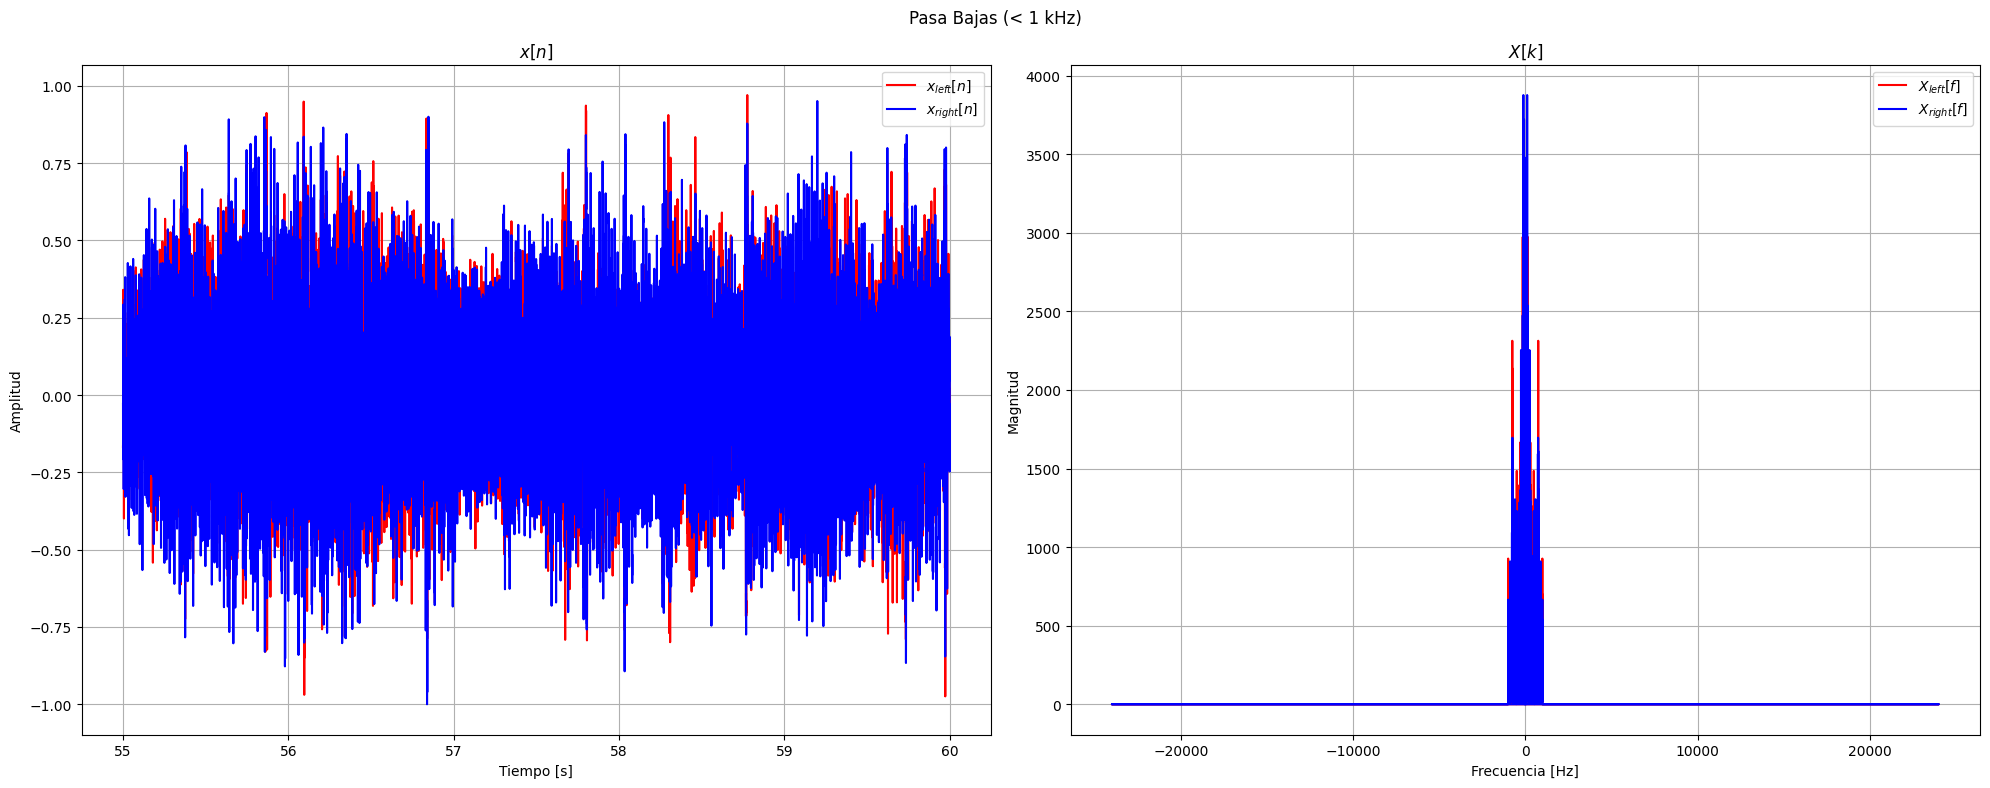

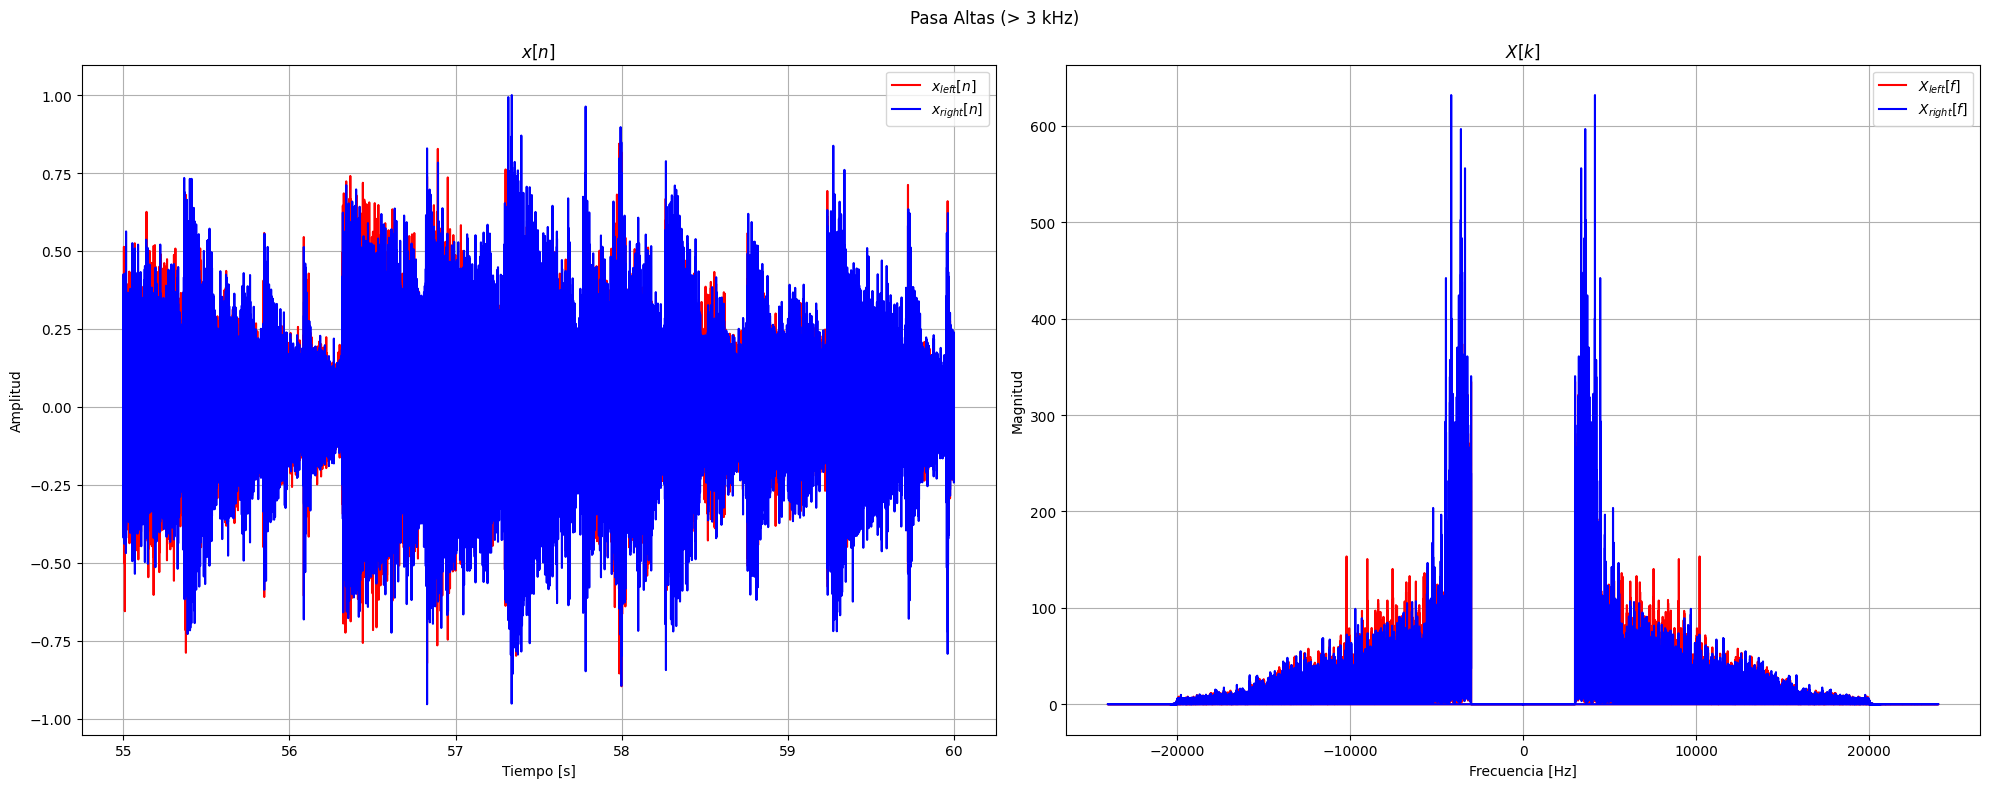

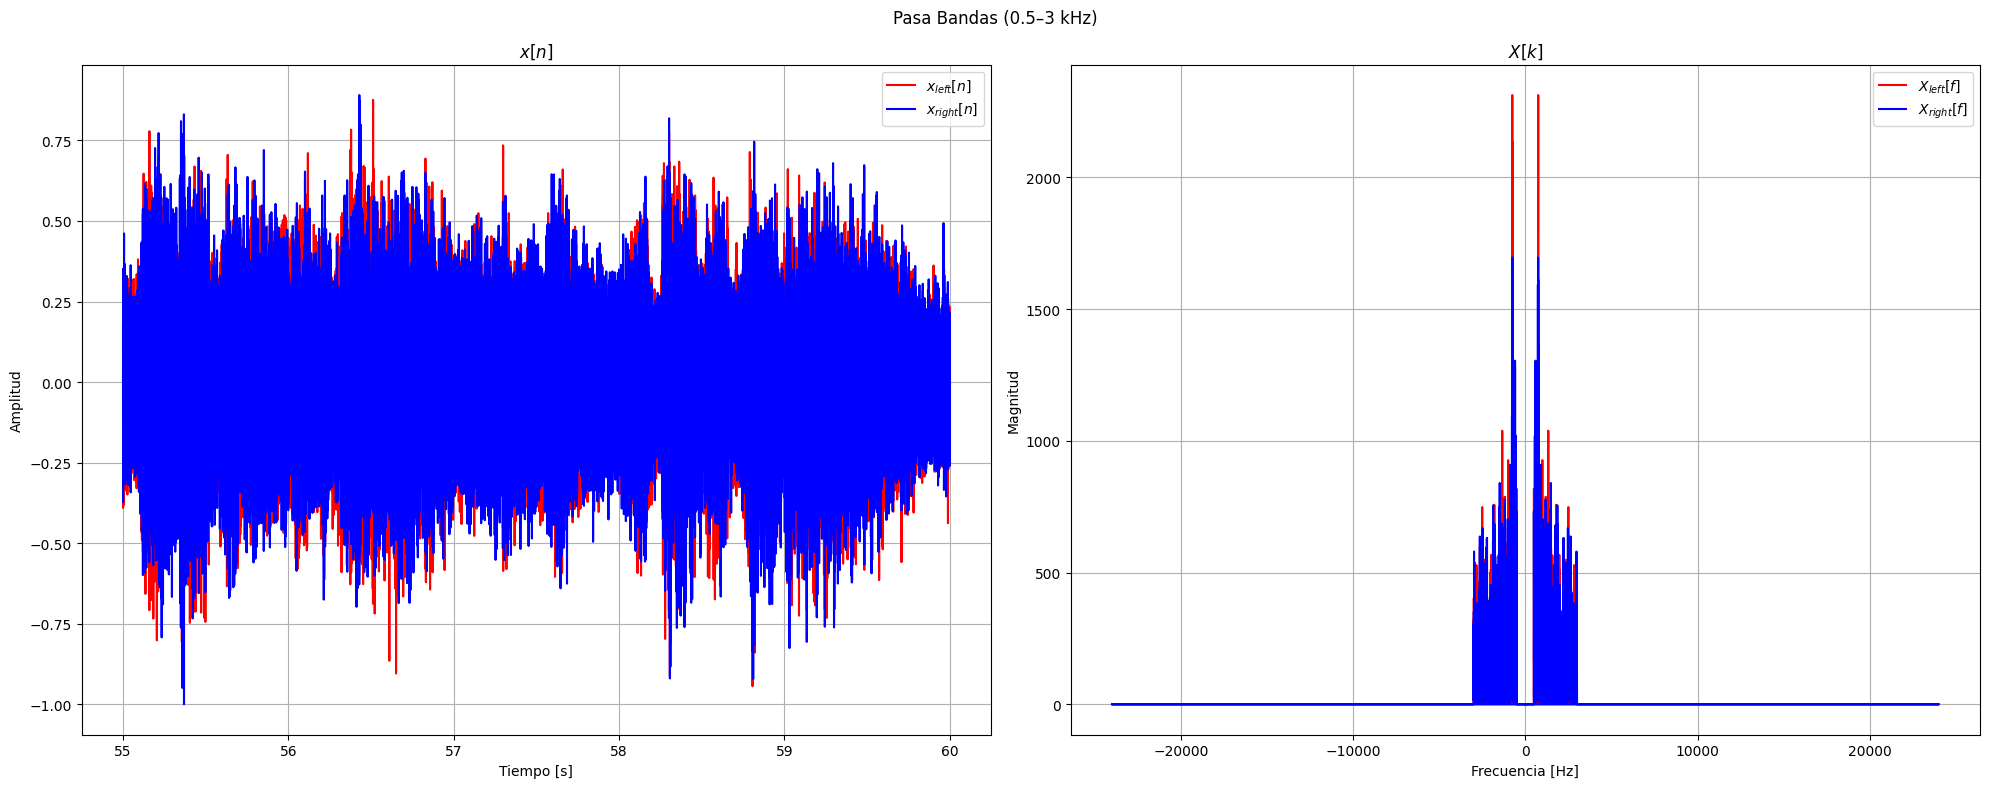

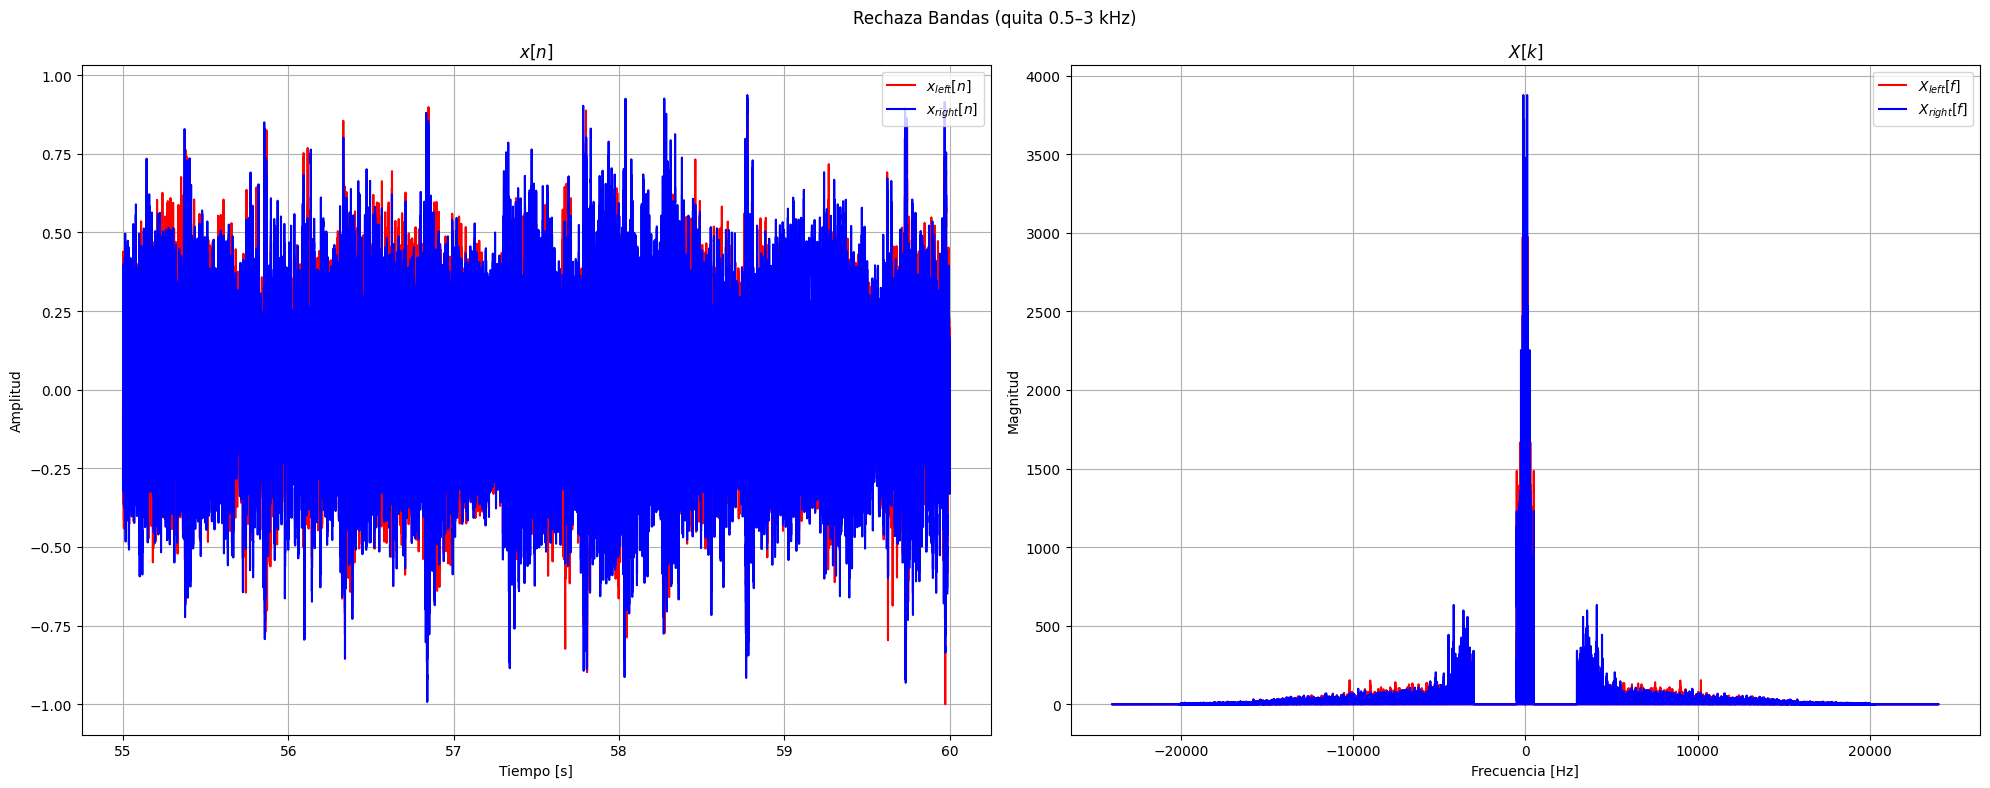

In [ ]:
plot_domains(t_n, y_lp_n, f_k, Y_lp, 'Pasa Bajas (< 1 kHz)')
display(Audio(y_lp_n.T, rate=F_s))

plot_domains(t_n, y_hp_n, f_k, Y_hp, 'Pasa Altas (> 3 kHz)')
display(Audio(y_hp_n.T, rate=F_s))

plot_domains(t_n, y_bp_n, f_k, Y_bp, 'Pasa Bandas (0.5–3 kHz)')
display(Audio(y_bp_n.T, rate=F_s))

plot_domains(t_n, y_bs_n, f_k, Y_bs, 'Rechaza Bandas (quita 0.5–3 kHz)')
display(Audio(y_bs_n.T, rate=F_s))


---
Diseñe e implemente un detector de género musical, que permita diferenciar entre dos tipos de género. Para ello, construya una base de datos con al menos 50 registros por género musical, de 5 segundos cada uno, y luego implemente un código que permita recibir un nuevo registro músical de 5 segundos para detectar el género de la canción a partir de los vecinos más cercanos según la distancia Euclídea entre la magnitud del espectro de Fourier del nuevo registro (ver clasificador KNN), y las magnitudes de los espectros de la base de datos construida (Ver Cuaderno YouTube Download/Detector).


In [ ]:
# --- Montar Drive y fijar carpeta del proyecto ---
from google.colab import drive
drive.mount('/content/drive')

import os, sys, subprocess
from pathlib import Path

BASE = Path("/content/drive/MyDrive/genero_knn")
BASE.mkdir(parents=True, exist_ok=True)
os.chdir(str(BASE))
print("Carpeta de trabajo:", Path().resolve())

# --- Dependencias ---
subprocess.check_call([sys.executable, "-m", "pip", "install", "-q",
                       "yt-dlp", "soundfile", "imageio-ffmpeg", "scipy", "matplotlib"])

print("Entorno listo.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Carpeta de trabajo: /content/drive/MyDrive/genero_knn
Entorno listo.


In [ ]:
from pathlib import Path

urls_dir = BASE / "urls"
urls_dir.mkdir(parents=True, exist_ok=True)

rock_urls_text = """https://www.youtube.com/watch?v=SqB4FSettTI&list=RDSqB4FSettTI&start_radio=1
https://www.youtube.com/watch?v=V7q1jN7k5lg&list=RDV7q1jN7k5lg&start_radio=1
https://www.youtube.com/watch?v=pH436MLc7kM&list=RDpH436MLc7kM&start_radio=1
https://www.youtube.com/watch?v=w5ODkszYleo&list=RDw5ODkszYleo&start_radio=1
https://www.youtube.com/watch?v=FaJXa88-QNE&list=RDFaJXa88-QNE&start_radio=1
https://www.youtube.com/watch?v=2tkT5Divh0A&list=RD2tkT5Divh0A&start_radio=1
https://www.youtube.com/watch?v=1WKN8uwct74&list=RD1WKN8uwct74&start_radio=1
https://www.youtube.com/watch?v=Zes-fOWXtIs&list=RDZes-fOWXtIs&start_radio=1
https://www.youtube.com/watch?v=T_FkEw27XJ0&list=RDT_FkEw27XJ0&start_radio=1
https://www.youtube.com/watch?v=nUXZe6hOm8c&list=RDnUXZe6hOm8c&start_radio=1
https://www.youtube.com/watch?v=f8pyNDYiC3M&list=RDf8pyNDYiC3M&start_radio=1
https://www.youtube.com/watch?v=VRxF8H-x_J0&list=RDVRxF8H-x_J0&start_radio=1
https://www.youtube.com/watch?v=9OHuzCj1sEI&list=RD9OHuzCj1sEI&start_radio=1
https://www.youtube.com/watch?v=gFrUotS51Pw&list=RDgFrUotS51Pw&start_radio=1
https://www.youtube.com/watch?v=_TsAzJD58Yo&list=RD_TsAzJD58Yo&start_radio=1
https://www.youtube.com/watch?v=UtUPSXkJ4UI&list=RDUtUPSXkJ4UI&start_radio=1
https://www.youtube.com/watch?v=tMA8FaM_eK4&list=RDtMA8FaM_eK4&start_radio=1
https://www.youtube.com/watch?v=jnDjEHyhFpU&list=RDjnDjEHyhFpU&start_radio=1
https://www.youtube.com/watch?v=fklkGNglSMY&list=RDfklkGNglSMY&start_radio=1
https://www.youtube.com/watch?v=SzimletXB7M&list=RDSzimletXB7M&start_radio=1
https://www.youtube.com/watch?v=f8ifhOWtA44&list=RDf8ifhOWtA44&start_radio=1
https://www.youtube.com/watch?v=JyHhKz5ILiU&list=RDJyHhKz5ILiU&start_radio=1
https://www.youtube.com/watch?v=mP5mk2Kh-y4&list=RDmP5mk2Kh-y4&start_radio=1
https://www.youtube.com/watch?v=0ITLTAyrP10&list=RD0ITLTAyrP10&start_radio=1
https://www.youtube.com/watch?v=vpDn5xYxqlE&list=RDeDipH-myZWE&index=3
https://www.youtube.com/watch?v=BUKHMGiW_rY&list=RDBUKHMGiW_rY&start_radio=1
http://youtube.com/watch?v=YdZ3FXHdKuU&list=RDYdZ3FXHdKuU&start_radio=1
https://www.youtube.com/watch?v=kwZu8vsJHBI&list=RDkwZu8vsJHBI&start_radio=1
https://www.youtube.com/watch?v=abLwErDrwJc&list=RDabLwErDrwJc&start_radio=1
https://www.youtube.com/watch?v=LtT92AVjZmM&list=RDLtT92AVjZmM&start_radio=1
https://www.youtube.com/watch?v=2FvmY7ckClM&list=RD2FvmY7ckClM&start_radio=1
https://www.youtube.com/watch?v=zZPvME8H2Oo&list=RDzZPvME8H2Oo&start_radio=1
https://www.youtube.com/watch?v=xVzlin-ixQU&list=RDxVzlin-ixQU&start_radio=1
https://www.youtube.com/watch?v=fBrX8ym3dBM&list=RDfBrX8ym3dBM&start_radio=1
https://www.youtube.com/watch?v=HL4HjQwMx-o&list=RDHL4HjQwMx-o&start_radio=1
https://www.youtube.com/watch?v=ZNzYr4U7Zs8&list=RDZNzYr4U7Zs8&start_radio=1
https://www.youtube.com/watch?v=1XVZDB6feFQ&list=RD1XVZDB6feFQ&start_radio=1
https://www.youtube.com/watch?v=BxDciewLqAU&list=RDBxDciewLqAU&start_radio=1
https://www.youtube.com/watch?v=LalPz4lIZYk&list=RDLalPz4lIZYk&start_radio=1
https://www.youtube.com/watch?v=Y-RQQds52qs&list=RDY-RQQds52qs&start_radio=1
https://www.youtube.com/watch?v=6VensWNwjow&list=RD6VensWNwjow&start_radio=1
https://www.youtube.com/watch?v=eDSI30SQbZA&list=RDeDSI30SQbZA&start_radio=1
https://www.youtube.com/watch?v=Ik12_kIEFAA&list=RDIk12_kIEFAA&start_radio=1
https://www.youtube.com/watch?v=6gDGFfrOMdI&list=RD6gDGFfrOMdI&start_radio=1
https://www.youtube.com/watch?v=ue0RP3C1Brg&list=RDue0RP3C1Brg&start_radio=1
https://www.youtube.com/watch?v=TKsYeWhPEI8&list=RDTKsYeWhPEI8&start_radio=1
https://www.youtube.com/watch?v=FIR-hrPXxzA&list=RDFIR-hrPXxzA&start_radio=1
https://www.youtube.com/watch?v=x813FfwbL4Q&list=RDx813FfwbL4Q&start_radio=1
https://www.youtube.com/watch?v=T8TtE-enslA&list=RDT8TtE-enslA&start_radio=1
https://www.youtube.com/watch?v=W7yuFPZ_9vY&list=RDW7yuFPZ_9vY&start_radio=1
https://www.youtube.com/watch?v=UCF9oHXhDMU&list=RDeDipH-myZWE&index=11
"""

salsa_urls_text = """https://www.youtube.com/watch?v=3VmoZrxXbmg&list=RDQMR_ch4OGY_IQ&start_radio=1
https://www.youtube.com/watch?v=SUgQHe902yQ&list=RDQMR_ch4OGY_IQ&index=2
https://www.youtube.com/watch?v=YXnjy5YlDwk&list=RDQMR_ch4OGY_IQ&index=3
https://www.youtube.com/watch?v=RUV55lGPGaY&list=RDQMR_ch4OGY_IQ&index=4
https://www.youtube.com/watch?v=2PVi95J-FMo&list=RDQMR_ch4OGY_IQ&index=6
https://www.youtube.com/watch?v=eOU5B7sttHw&list=RDQMR_ch4OGY_IQ&index=9
https://www.youtube.com/watch?v=joucE2oAYDY&list=RDQMR_ch4OGY_IQ&index=10
https://www.youtube.com/watch?v=TXYMMsoTMLQ&list=RDTXYMMsoTMLQ&start_radio=1
https://www.youtube.com/watch?v=sJqDmVekMWU&list=RDsJqDmVekMWU&start_radio=1
https://www.youtube.com/watch?v=oqWGmyy4fgk&list=RDoqWGmyy4fgk&start_radio=1
https://www.youtube.com/watch?v=toLrTToaN0M&list=RDtoLrTToaN0M&start_radio=1
https://www.youtube.com/watch?v=gxlB1B9emDc&list=RDgxlB1B9emDc&start_radio=1
https://www.youtube.com/watch?v=mXZRB_al3fs&list=RDmXZRB_al3fs&start_radio=1
https://www.youtube.com/watch?v=XVUCXQPbb1c&list=RDXVUCXQPbb1c&start_radio=1
https://www.youtube.com/watch?v=dcTyr5fhTi4&list=RDdcTyr5fhTi4&start_radio=1
https://www.youtube.com/watch?v=g4S3jUtqcyM&list=RDg4S3jUtqcyM&start_radio=1
https://www.youtube.com/watch?v=G9-IGDyFXnI&list=RDG9-IGDyFXnI&start_radio=1
https://www.youtube.com/watch?v=zJiqglUzWrY&list=RDzJiqglUzWrY&start_radio=1
https://www.youtube.com/watch?v=bZhAUJA2-DY&list=RDbZhAUJA2-DY&start_radio=1
https://www.youtube.com/watch?v=dRwMTzHf4jo&list=RDdRwMTzHf4jo&start_radio=1
https://www.youtube.com/watch?v=L-AushSSq2I&list=RDL-AushSSq2I&start_radio=1
https://www.youtube.com/watch?v=_WVeEhPJcCg&list=RD_WVeEhPJcCg&start_radio=1
https://www.youtube.com/watch?v=py7LKeVQojU&list=RDpy7LKeVQojU&start_radio=1
https://www.youtube.com/watch?v=UTrd-aX3sC4&list=RDUTrd-aX3sC4&start_radio=1
https://www.youtube.com/watch?v=WOqijjNm7-Q&list=RDWOqijjNm7-Q&start_radio=1
https://www.youtube.com/watch?v=_7KQFxEyBmk&list=RD_7KQFxEyBmk&start_radio=1
https://www.youtube.com/watch?v=KNcaw0Ye69g&list=RDKNcaw0Ye69g&start_radio=1
https://www.youtube.com/watch?v=7KxkMLAZlzw&list=RD7KxkMLAZlzw&start_radio=1
https://www.youtube.com/watch?v=GOiKfJOsbuA&list=RDGOiKfJOsbuA&start_radio=1
https://www.youtube.com/watch?v=1yfDOF3p_rs&list=RD1yfDOF3p_rs&start_radio=1
https://www.youtube.com/watch?v=O9g1_EkNxW4&list=RDO9g1_EkNxW4&start_radio=1
https://www.youtube.com/watch?v=7oMpHHDbn-A&list=RD7oMpHHDbn-A&start_radio=1
https://www.youtube.com/watch?v=iT7BErXojyE&list=RDiT7BErXojyE&start_radio=1
https://www.youtube.com/watch?v=-OnAEJ4bh_I&list=RD-OnAEJ4bh_I&start_radio=1
https://www.youtube.com/watch?v=KhYijV-z8Ao&list=RDKhYijV-z8Ao&start_radio=1
https://www.youtube.com/watch?v=7kbjKCj-rMQ&list=RD7kbjKCj-rMQ&start_radio=1
https://www.youtube.com/watch?v=VelD64XLvjI&list=RDVelD64XLvjI&start_radio=1
https://www.youtube.com/watch?v=u5rEC9qlGks&list=RDu5rEC9qlGks&start_radio=1
https://www.youtube.com/watch?v=7Ho86ggAVrY&list=RD7Ho86ggAVrY&start_radio=1
https://www.youtube.com/watch?v=oW8UfSTQEmo&list=RDoW8UfSTQEmo&start_radio=1
https://www.youtube.com/watch?v=wQUcaSEuob0&list=RDwQUcaSEuob0&start_radio=1
https://www.youtube.com/watch?v=AiedUZWxGtA&list=RDAiedUZWxGtA&start_radio=1
https://www.youtube.com/watch?v=s3fcKFQukbY&list=RDs3fcKFQukbY&start_radio=1
https://www.youtube.com/watch?v=OfgdBBQEAuQ&list=RDOfgdBBQEAuQ&start_radio=1
https://www.youtube.com/watch?v=wf5TXPhYNRU&list=RDwf5TXPhYNRU&start_radio=1
https://www.youtube.com/watch?v=npfei1QOq3k&list=RDnpfei1QOq3k&start_radio=1
https://www.youtube.com/watch?v=n_TPgG58aOw&list=RDn_TPgG58aOw&start_radio=1
https://www.youtube.com/watch?v=pRhKY1jVJwE&list=RDpRhKY1jVJwE&start_radio=1
https://www.youtube.com/watch?v=DzB80tCCPWE&list=RDDzB80tCCPWE&start_radio=1
https://www.youtube.com/watch?v=pz9O3UeM_o0&list=RDpz9O3UeM_o0&start_radio=1
https://www.youtube.com/watch?v=FO5i4STK_tU&list=RDFO5i4STK_tU&start_radio=1
"""

(urls_dir / "rock.txt").write_text(rock_urls_text.strip() + "\n", encoding="utf-8")
(urls_dir / "salsa.txt").write_text(salsa_urls_text.strip() + "\n", encoding="utf-8")

print("Escritos:")
for p in sorted(urls_dir.glob("*.txt")):
    print(" -", p.name, "(", sum(1 for _ in p.read_text(encoding='utf-8').splitlines() if _.strip()), "URLs )")


Escritos:
 - rock.txt ( 51 URLs )
 - salsa.txt ( 51 URLs )


In [ ]:
import json, time
import numpy as np
import soundfile as sf
import imageio_ffmpeg
from scipy.signal import resample_poly
from IPython.display import Audio, display

FFMPEG_EXE = imageio_ffmpeg.get_ffmpeg_exe()

# Parámetros
TARGET_SR   = 22050
SEG_SECONDS = 5.0
BINS        = 4096
K           = 7
RNG         = np.random.default_rng(42)

# Rutas de la base
MUSIC_DB   = BASE / "music_db"
AUDIO_DIR  = MUSIC_DB / "raw"
SEG_DIR    = MUSIC_DB / "segments"
FEAT_PATH  = MUSIC_DB / "features.npz"
for d in [MUSIC_DB, AUDIO_DIR, SEG_DIR]:
    d.mkdir(parents=True, exist_ok=True)

def download_youtube_wav(url: str, out_dir: Path) -> Path:
    """Descarga audio a WAV usando yt-dlp y ffmpeg embebido de imageio-ffmpeg."""
    import subprocess, sys
    # Asegurar yt-dlp:
    try:
        subprocess.run(['yt-dlp', '--version'], check=True, capture_output=True)
    except FileNotFoundError:
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'yt-dlp'])
    stamp = int(time.time() * 1000)
    out_tmpl = str(out_dir / f"yt_{stamp}.%(ext)s")
    cmd = ["yt-dlp", "--no-playlist", "--extract-audio",
           "--audio-format", "wav",
           "--ffmpeg-location", FFMPEG_EXE,
           "-o", out_tmpl, url]
    subprocess.run(cmd, check=True)
    wavs = sorted(out_dir.glob(f"yt_{stamp}*.wav"), key=lambda p: p.stat().st_mtime, reverse=True)
    if not wavs:
        raise FileNotFoundError("No se encontró WAV tras descargar.")
    return wavs[0]

def load_mono_resampled_5s(wav_path: Path, target_sr: int = TARGET_SR,
                           start_sec: float | None = None, seg_seconds: float = SEG_SECONDS):
    """Mono + resample + recorte a 5 s (aleatorio si start_sec=None) y normalización pico."""
    x, sr = sf.read(wav_path)
    if x.ndim == 2:
        x = x.mean(axis=1)
    if sr != target_sr:
        from fractions import Fraction
        frac = Fraction(target_sr, sr).limit_denominator(1000)
        x = resample_poly(x, frac.numerator, frac.denominator)
        sr = target_sr
    seg_len = int(seg_seconds * sr)
    if len(x) < seg_len:
        x = np.pad(x, (0, seg_len - len(x)))
    else:
        if start_sec is None:
            max_start = (len(x)/sr) - seg_seconds
            ss = float(RNG.uniform(0, max_start)) if max_start > 0 else 0.0
        else:
            ss = float(max(0.0, min(start_sec, (len(x)/sr) - seg_seconds)))
        i0 = int(ss * sr)
        x = x[i0:i0+seg_len]
    x = (x / (np.max(np.abs(x)) + 1e-12)).astype(np.float32)
    return x, sr

def fft_mag_features(x: np.ndarray, sr: int, bins: int = BINS,
                     use_log: bool = True, l2norm: bool = True) -> np.ndarray:
    """Magnitud de rFFT con ventana Hann, compresión log1p e interpolación a 'bins'."""
    w = np.hanning(len(x)).astype(np.float32)
    X = np.fft.rfft(x * w)
    mag = np.abs(X)
    if use_log:
        mag = np.log1p(mag)
    f_src = np.linspace(0, sr/2, mag.shape[0])
    f_dst = np.linspace(0, sr/2, bins)
    feat = np.interp(f_dst, f_src, mag).astype(np.float32)
    if l2norm:
        feat /= (np.linalg.norm(feat) + 1e-12)
    return feat

def read_urls_from_txt(path: Path) -> list[str]:
    return [ln.strip() for ln in path.read_text(encoding="utf-8").splitlines() if ln.strip()]

def build_genre_set(genre: str, urls: list[str], n_per_genre: int = 50):
    """Descarga, extrae segmento 5s, saca features y guarda el segmento. Devuelve (F, meta)."""
    feats, meta, got, idx = [], [], 0, 0
    print(f"==> {genre} (objetivo {n_per_genre})")
    while got < n_per_genre and idx < len(urls):
        url = urls[idx]; idx += 1
        try:
            wav = download_youtube_wav(url, AUDIO_DIR)
            x, sr = load_mono_resampled_5s(wav, TARGET_SR, None, SEG_SECONDS)
            seg_path = SEG_DIR / f"{genre}_{got:04d}.wav"
            sf.write(seg_path, x, sr)
            feats.append(fft_mag_features(x, sr, BINS, True, True))
            meta.append(json.dumps({"genre": genre, "url": url, "wav": str(seg_path)}))
            got += 1
            print(f"  [+] {genre}: {got}/{n_per_genre}")
        except Exception as e:
            print(f"  [!] Falló: {url} -> {e}")
    if got < n_per_genre:
        raise RuntimeError(f"Solo {got}/{n_per_genre} para {genre}. Añade más URLs.")
    return np.stack(feats, 0), meta

def knn_predict(x_feat: np.ndarray, X_db: np.ndarray, y_db: np.ndarray, k: int = K):
    diffs = X_db - x_feat[None, :]
    dists = np.sqrt(np.sum(diffs*diffs, axis=1))
    idx = np.argsort(dists)[:k]
    votes = y_db[idx]
    counts = np.bincount(votes, minlength=2)
    label = votes[0] if counts[0] == counts[1] else int(np.argmax(counts))
    return label, idx, dists[idx]

def load_db(feat_path: Path = FEAT_PATH):
    z = np.load(feat_path, allow_pickle=True)
    return z["X_db"], z["y_db"], z["meta_db"], z["labels"]

def classify_youtube(url: str, k: int = K):
    wav = download_youtube_wav(url, AUDIO_DIR)
    x, sr = load_mono_resampled_5s(wav, TARGET_SR, None, SEG_SECONDS)
    feat = fft_mag_features(x, sr, BINS, True, True)
    X_db, y_db, meta_db, labels = load_db(FEAT_PATH)
    lab, idx, d = knn_predict(feat, X_db, y_db, k)
    print(f"Predicción: {labels[lab]}")
    for r, (ii, di) in enumerate(zip(idx, d), 1):
        md = json.loads(meta_db[ii])
        print(f"{r:2d}) y={labels[y_db[ii]]}  dist={di:.4f}  src={md.get('wav','')}")
    display(Audio(x, rate=sr))
    return labels[lab], idx, d

def classify_wav(path: Path, k: int = K):
    X_db, y_db, meta_db, labels = load_db(FEAT_PATH)
    x, sr = load_mono_resampled_5s(path, TARGET_SR, None, SEG_SECONDS)
    feat = fft_mag_features(x, sr, BINS, True, True)
    lab, idx, d = knn_predict(feat, X_db, y_db, k)
    print(f"Predicción: {labels[lab]}")
    for r, (ii, di) in enumerate(zip(idx, d), 1):
        md = json.loads(meta_db[ii])
        print(f"{r:2d}) y={labels[y_db[ii]]}  dist={di:.4f}  src={md.get('wav','')}")
    display(Audio(x, rate=sr))
    return labels[lab], idx, d


In [ ]:
# Lee los dos archivos y construye la base mínima (50 por género)
rock_file  = urls_dir / "rock.txt"
salsa_file = urls_dir / "salsa.txt"
assert rock_file.exists() and salsa_file.exists(), "Faltan urls/rock.txt y/o urls/salsa.txt"

rock_urls  = read_urls_from_txt(rock_file)
salsa_urls = read_urls_from_txt(salsa_file)
print("rock:", len(rock_urls), "| salsa:", len(salsa_urls))

GENRE_A, GENRE_B = "rock", "salsa"
N_PER_GENRE      = 50  # mínimo requerido

F_a, M_a = build_genre_set(GENRE_A, rock_urls,  N_PER_GENRE)
F_b, M_b = build_genre_set(GENRE_B, salsa_urls, N_PER_GENRE)

X_db   = np.vstack([F_a, F_b])
y_db   = np.array([0]*len(F_a) + [1]*len(F_b), int)
meta_db= np.array(M_a + M_b, dtype=object)
labels = np.array([GENRE_A, GENRE_B], dtype=object)

np.savez(FEAT_PATH, X_db=X_db, y_db=y_db, meta_db=meta_db, labels=labels)
print("✓ Base guardada en", FEAT_PATH)
X_db.shape, y_db.shape, labels


rock: 51 | salsa: 51
==> rock (objetivo 50)
  [+] rock: 1/50
  [+] rock: 2/50
  [+] rock: 3/50
  [+] rock: 4/50
  [+] rock: 5/50
  [+] rock: 6/50
  [+] rock: 7/50
  [+] rock: 8/50
  [+] rock: 9/50
  [+] rock: 10/50
  [+] rock: 11/50
  [+] rock: 12/50
  [+] rock: 13/50
  [+] rock: 14/50
  [+] rock: 15/50
  [+] rock: 16/50
  [+] rock: 17/50
  [+] rock: 18/50
  [+] rock: 19/50
  [+] rock: 20/50
  [+] rock: 21/50
  [+] rock: 22/50
  [+] rock: 23/50
  [+] rock: 24/50
  [+] rock: 25/50
  [+] rock: 26/50
  [+] rock: 27/50
  [+] rock: 28/50
  [+] rock: 29/50
  [+] rock: 30/50
  [+] rock: 31/50
  [+] rock: 32/50
  [+] rock: 33/50
  [+] rock: 34/50
  [+] rock: 35/50
  [+] rock: 36/50
  [+] rock: 37/50
  [+] rock: 38/50
  [+] rock: 39/50
  [+] rock: 40/50
  [+] rock: 41/50
  [+] rock: 42/50
  [+] rock: 43/50
  [+] rock: 44/50
  [+] rock: 45/50
  [+] rock: 46/50
  [+] rock: 47/50
  [+] rock: 48/50
  [+] rock: 49/50
  [+] rock: 50/50
==> salsa (objetivo 50)
  [+] salsa: 1/50
  [+] salsa: 2/50
  [+]

((100, 4096), (100,), array(['rock', 'salsa'], dtype=object))

In [ ]:
# Cambia TEST_URL por cualquier video a clasificar (toma 5 s aleatorios)
TEST_URL = "https://www.youtube.com/watch?v=SqB4FSettTI"
pred, idx, d = classify_youtube(TEST_URL)
pred


Predicción: rock
 1) y=rock  dist=0.3004  src=/content/drive/MyDrive/genero_knn/music_db/segments/rock_0000.wav
 2) y=rock  dist=0.3062  src=/content/drive/MyDrive/genero_knn/music_db/segments/rock_0019.wav
 3) y=salsa  dist=0.3067  src=/content/drive/MyDrive/genero_knn/music_db/segments/salsa_0030.wav
 4) y=rock  dist=0.3068  src=/content/drive/MyDrive/genero_knn/music_db/segments/rock_0003.wav
 5) y=rock  dist=0.3078  src=/content/drive/MyDrive/genero_knn/music_db/segments/rock_0011.wav
 6) y=rock  dist=0.3087  src=/content/drive/MyDrive/genero_knn/music_db/segments/rock_0044.wav
 7) y=rock  dist=0.3087  src=/content/drive/MyDrive/genero_knn/music_db/segments/rock_0021.wav


'rock'

###Visualización


Explained variance (PCA 2D): 0.45706657


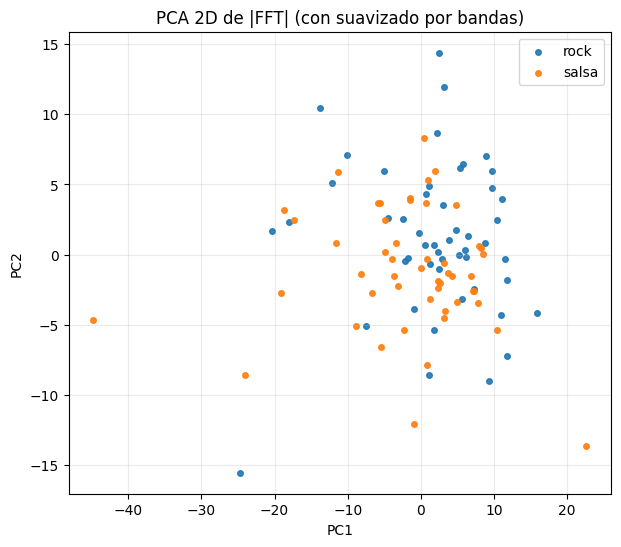

In [ ]:
# === Visualización 2D súper compacta (PCA) ===
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1) Cargamos la base (usa tu misma función)
X_db, y_db, meta_db, labels = load_db(FEAT_PATH)

# 2) (Opcional pero muy útil) Suavizar el espectro promediando por grupos de bins
#    Reduce ruido y la dimensión sin cambiar "qué mide" la FFT.
def smooth_bins(X, group=16):
    M = (X.shape[1] // group) * group
    Xc = X[:, :M].reshape(len(X), M//group, group).mean(axis=-1)
    return Xc

# Activa o no el suavizado:
USE_SMOOTH = True
GROUP = 16          # 4096/16=256 dims. Puedes probar 8 o 32.
Xv = smooth_bins(X_db, GROUP) if USE_SMOOTH else X_db

# 3) Estandarizar y proyectar a 2D con PCA
Xs = StandardScaler().fit_transform(Xv)
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(Xs)

print("Explained variance (PCA 2D):", pca.explained_variance_ratio_.sum())

# 4) Graficar
colors = np.array(['tab:blue','tab:orange'])
plt.figure(figsize=(7,6))
for k in [0,1]:
    plt.scatter(X2[y_db==k,0], X2[y_db==k,1], s=16, alpha=0.9,
                label=str(labels[k]), c=colors[k])
plt.legend()
plt.title("PCA 2D de |FFT| (con suavizado por bandas)" if USE_SMOOTH else "PCA 2D de |FFT|")
plt.grid(alpha=0.25)
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()


In [ ]:
def load_mono_resampled_5s(wav_path: Path, target_sr: int = TARGET_SR,
                           start_sec: float | None = None, seg_seconds: float = SEG_SECONDS):
    import soundfile as sf
    from fractions import Fraction
    from scipy.signal import resample_poly
    x, sr = sf.read(wav_path)
    if x.ndim == 2:
        x = x.mean(axis=1)

    # Resample
    if sr != target_sr:
        frac = Fraction(target_sr, sr).limit_denominator(1000)
        x = resample_poly(x, frac.numerator, frac.denominator)
        sr = target_sr

    seg_len = int(seg_seconds * sr)
    if len(x) <= seg_len:
        y = np.pad(x, (0, seg_len - len(x)))
    else:
        if start_sec is not None:
            i0 = int(max(0.0, min(start_sec, len(x)/sr - seg_seconds)) * sr)
            y = x[i0:i0+seg_len]
        else:
            # --- elegir ventana de máxima energía RMS ---
            hop = int(0.25 * sr)  # 250 ms
            best_i0, best_rms = 0, -1.0
            for i0 in range(0, len(x) - seg_len + 1, hop):
                w = x[i0:i0+seg_len]
                rms = np.sqrt(np.mean(w*w) + 1e-12)
                if rms > best_rms:
                    best_rms, best_i0 = rms, i0
            y = x[best_i0:best_i0+seg_len]

    y = (y / (np.max(np.abs(y)) + 1e-12)).astype(np.float32)
    return y, sr


In [ ]:
def fft_mag_features(x: np.ndarray, sr: int, bins: int = BINS,
                     use_log: bool = True, l2norm: bool = True,
                     fmin: float = 60.0, fmax: float = 12000.0,
                     smooth_group: int = 16):
    # FFT
    w = np.hanning(len(x)).astype(np.float32)
    X = np.fft.rfft(x * w)
    mag = np.abs(X)

    # Limitar banda útil
    freqs = np.linspace(0.0, sr/2, len(mag))
    band = (freqs >= fmin) & (freqs <= fmax)
    mag = mag[band]; freqs = freqs[band]

    if use_log:
        mag = np.log1p(mag)

    # Suavizado por grupos de bins contiguos (reduce ruido fino)
    if smooth_group > 32:
        M = (len(mag) // smooth_group) * smooth_group
        mag = mag[:M].reshape(-1, smooth_group).mean(axis=1)
        freqs = freqs[:M].reshape(-1, smooth_group).mean(axis=1)

    # Reinterpolar a 'bins'
    f_dst = np.linspace(freqs[0], freqs[-1], bins)
    feat = np.interp(f_dst, freqs, mag).astype(np.float32)

    if l2norm:
        feat /= (np.linalg.norm(feat) + 1e-12)
    return feat


Varianza explicada (2D): 0.22226416


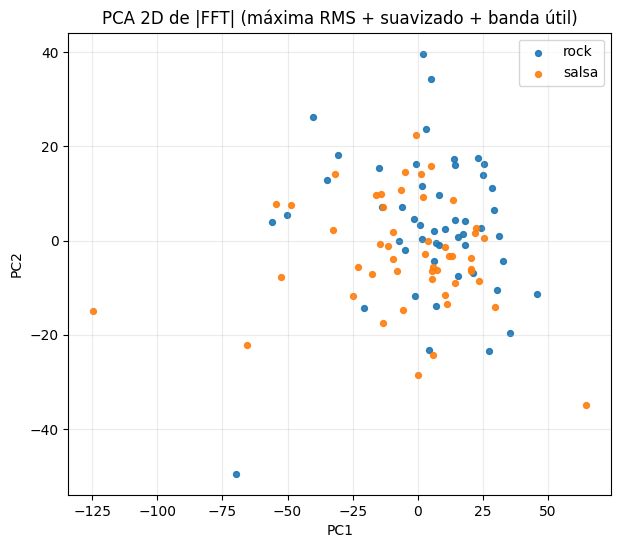

In [ ]:
# === Visualización PCA 2D (compacta) ===
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X_db, y_db, meta_db, labels = load_db(FEAT_PATH)

# Estandarizar (z-score) y PCA a 2D
Xs = StandardScaler().fit_transform(X_db)
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(Xs)
print("Varianza explicada (2D):", pca.explained_variance_ratio_.sum())

# Gráfico
colors = np.array(['tab:blue','tab:orange'])
plt.figure(figsize=(7,6))
for k in [0,1]:
    plt.scatter(X2[y_db==k,0], X2[y_db==k,1], s=18, alpha=0.9,
                c=colors[k], label=str(labels[k]))
plt.legend(); plt.grid(alpha=0.25)
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.title("PCA 2D de |FFT| (máxima RMS + suavizado + banda útil)")
plt.show()


---